In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from stocker import Stocker

In [7]:
apply = Stocker('AAPL')

AAPL Stocker Initialized. Data covers 1980-12-12 00:00:00 to 2018-03-27 00:00:00.


Maximum Adj. Close = 181.72 on 2018-03-12 00:00:00.
Minimum Adj. Close = 0.16 on 1982-07-08 00:00:00.
Current Adj. Close = 168.34 on 2018-03-27 00:00:00.



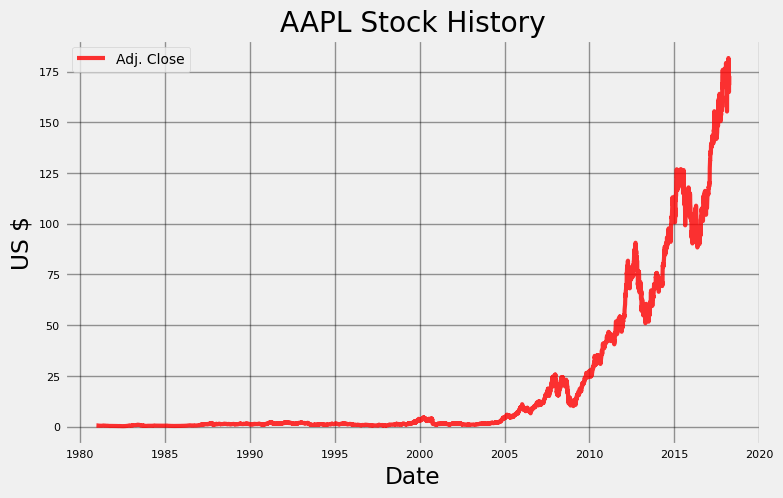

In [8]:
apply.plot_stock()

# 金融时间序列分析

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# 导入数据
- 以时间为索引
- 将时间转化为标准格式
- 绘制展示各个指标的走势情况

In [ ]:
data=pd.read_cvs('data.csv',index_col=0,parse_dates=True)

In [ ]:
data.head()

In [ ]:
data.plot(figsize=(10,12),subplots=True)

* 计算连续时间增长率

In [ ]:
res = np.log(data/data.shift(1))
res.head().round(3)

现值随时间变化当值

In [3]:
res.cumsum().apply(np.exp).plot(figsize=(10,6))

array([ 1,  3,  6, 10])

时间序列重采样
* 以周为单位的重采样
* 不同指定标签的含义

In [ ]:
data.resample('1w').last().head()

# 时间窗口
* 1.以20为长度做时间窗口序列
* 2.统计各个窗口常用指标结果

In [ ]:
data2 = data.dropna()

In [1]:
windows=20

In [ ]:
data2['AAPL.0'].rolling(window=windows).min()

In [ ]:
data2['min'] = data2['AAPL.0'].rolling(window=windows).min()
data2['max'] = data2['AAPL.0'].rolling(window=windows).max()
data2['mean'] = data2['AAPL.0'].rolling(window=windows).mean()
data2['std'] = data2['AAPL.0'].rolling(window=windows).std()

In [ ]:
data2.tail()

# 股票序列分析策略
- 短期平均计算
- 长期平均计算
- 黄金交叉与死亡交叉绘图展示

In [ ]:
data2['m1'] = data2['AAPL.0'].rolling(window=10).mean()

In [ ]:
data2['m2'] = data2['AAPL.0'].rolling(window=30).mean()

In [ ]:
data2[['AAPL.0','m1','m2']].tail()

In [ ]:
data2[['AAPL.0','m1','m2']].plot(figsize=(10,6))

黄金交叉->赚钱
死亡交叉->亏钱

# 黄金交叉
短期>长期
# 死亡交叉
短期<长期

In [ ]:
data2['postions']=np.where(data2['m1']>data2['m2'],1,-1)
data2.head()

In [ ]:
data2[['AAPL.0','m1','m2']].plot(figsize=(10,6),secondary_y='positions')

### 右边轴

# 回归分析
- [.spx and .vix]指标间的关系
- 绘图展示他们间的变化情况
- 回归与相关系数计算
- 随年份变化，计算相关系数的变化情况，且展示

In [ ]:
data2=data2[['.SPX','.VIX']]
data2.head()

In [ ]:
data2.plot(subplots=True)
# 放到两个图当中展示

In [ ]:
# 左右轴展示
data2.loc[:'2012-12-31'].plot(secondary_y='.VIX',figsize=(10,6))

In [ ]:
# 散点图
rets = np.log(data/data.shift(1))
rets.head()
# 和密度图
pd.plotting.scatter_matrix(rets, diagonal='kde', alpha=0.5, figsize=(10, 6))
plt.show()

构建回归方程

In [ ]:
rets.dropna(inplace=True)

In [ ]:
reg=np.polyfit(rets['.SPX'],rets['.VIX'],deg=1)#阶值 
rets.head()

In [ ]:
ax=rets.plot(kind='scatter',x='.SPX',y='.VIX',figsize(10,6))
ax.plot(rets['.SPX'],np.polyval(reg,rets['.SPX'],),'r')

相关系数

In [ ]:
rets.corr()

In [ ]:
rets['.SPX'].rolling(window=250).corr(rets['.VIX']).plot(figsize(10,6))